In [1]:
%load_ext rqalpha 

In [2]:
%%rqalpha -h
""

Usage: ipykernel_launcher.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  --position TEXT                 set init position
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p|r]
  -rp, --round-price
  -mk, --market [cn|hk]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --logger TEXT...                config logger, e.g. --logger system_log
                                  debug
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --co

2018-01-03 WARN 订单创建失败: 下单量为 0
2018-01-04 WARN 订单创建失败: 下单量为 0
2018-01-05 WARN 订单创建失败: 下单量为 0
2018-01-08 WARN 订单创建失败: 下单量为 0
2018-01-09 WARN 订单创建失败: 下单量为 0
2018-01-10 INFO positions hs300: 0, zz500: 15, gz: 0
2018-01-11 WARN 订单创建失败: 下单量为 0
2018-01-11 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-12 WARN 订单创建失败: 下单量为 0
2018-01-12 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-15 WARN 订单创建失败: 下单量为 0
2018-01-15 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-16 WARN 订单创建失败: 下单量为 0
2018-01-16 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-17 WARN 订单创建失败: 下单量为 0
2018-01-17 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-18 WARN 订单创建失败: 下单量为 0
2018-01-18 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-19 WARN 订单创建失败: 下单量为 0
2018-01-19 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-22 WARN 订单创建失败: 下单量为 0
2018-01-22 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-23 WARN 订单创建失败: 下单量为 0
2018-01-23 INFO positions hs300: 23, zz500: 0, gz: 0
2018-01-24 WARN 订单创建失败: 下单量为 0
2018-

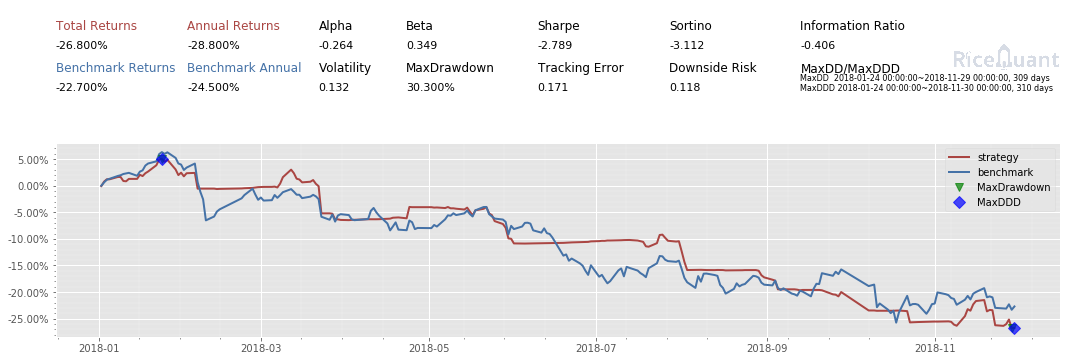

In [3]:
%%rqalpha -s 20180101 -e 20181201 -p -bm 000001.XSHG --account stock 100000
#RQALPHA回测测试
def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))


2018-01-03 WARN 订单创建失败: 下单量为 0
2018-01-04 WARN 订单创建失败: 下单量为 0
2018-01-05 WARN 订单创建失败: 下单量为 0
2018-01-08 WARN 订单创建失败: 下单量为 0
2018-01-09 WARN 订单创建失败: 下单量为 0
2018-01-11 WARN 订单创建失败: 下单量为 0
2018-01-12 WARN 订单创建失败: 下单量为 0
2018-01-15 WARN 订单创建失败: 下单量为 0
2018-01-16 WARN 订单创建失败: 下单量为 0
2018-01-17 WARN 订单创建失败: 下单量为 0
2018-01-18 WARN 订单创建失败: 下单量为 0
2018-01-19 WARN 订单创建失败: 下单量为 0
2018-01-22 WARN 订单创建失败: 下单量为 0
2018-01-23 WARN 订单创建失败: 下单量为 0
2018-01-24 WARN 订单创建失败: 下单量为 0
2018-01-25 WARN 订单创建失败: 下单量为 0
2018-01-26 WARN 订单创建失败: 下单量为 0
2018-01-29 WARN 订单创建失败: 下单量为 0
2018-01-30 WARN 订单创建失败: 下单量为 0
2018-01-31 WARN 订单创建失败: 下单量为 0
2018-02-01 WARN 订单创建失败: 下单量为 0
2018-02-02 WARN 订单创建失败: 下单量为 0
2018-02-05 WARN 订单创建失败: 下单量为 0
2018-02-06 WARN 订单创建失败: 可用资金不足。当前资金: 99443.87，000012.XSHG 下单所需资金: 99464.95。
2018-02-07 WARN 订单创建失败: 可用资金不足。当前资金: 99443.87，000012.XSHG 下单所需资金: 99471.11。
2018-02-08 WARN 订单创建失败: 可用资金不足。当前资金: 99443.87，000012.XSHG 下单所需资金: 99477.28。
2018-02-09 WARN 订单创建失败: 可用资金不足。当前资金: 99443.87，000012.XSHG 下

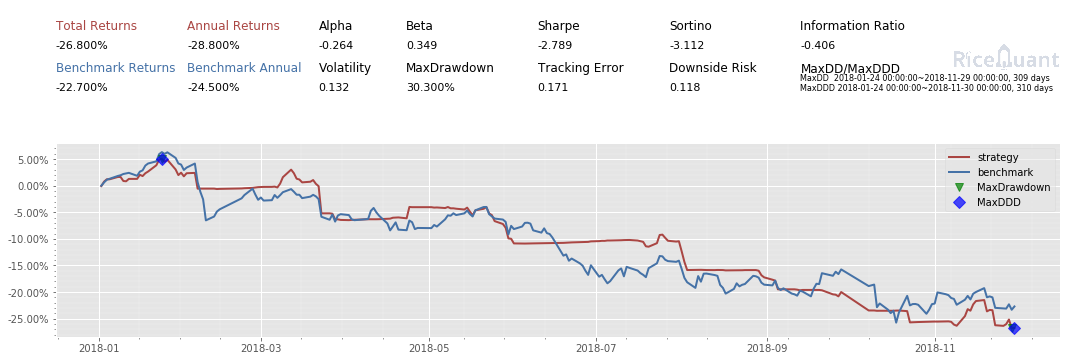

In [4]:
#funcat回测测试
config = {
  "base": {
    "start_date": "2018-01-01",
    "end_date": "2018-12-01",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}
from rqalpha.api import *
from rqalpha import run_func
def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0] 
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)       
results = run_func(init=init, handle_bar=handle_bar, config=config)        

In [5]:
#测试模块多环境整合！！！
from kivy.app import App #kivy跨平台编译环境
import kivy 
print ("kivy",kivy.__version__)
import matplotlib 
print ("matplotlib",matplotlib.__version__)
import numpy 
print ("numpy",numpy.__version__)
import funcat  #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
print("funcat",funcat.__version__)
import tushare  #TUSHARE数据连接更新。
print ("tushare",tushare.__version__)
import rqalpha #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
print("rqalpha",rqalpha.__version__)
import abupy #abupy环境测试
print("abupy",abupy.__version__)
import pymongo
print("pymongo",pymongo.__version__)

[INFO   ] [Logger      ] Record log in /Users/zy/.kivy/logs/kivy_18-12-06_5.txt
[INFO   ] [Kivy        ] v1.10.1
[INFO   ] [Python      ] v3.6.5 (default, Jun 21 2018, 07:41:06) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)


kivy 1.10.1
matplotlib 3.0.2
numpy 1.15.4
funcat 0.3.2
tushare 1.2.17
rqalpha 3.2.0
abupy 0.4.0
pymongo 3.7.2


[DEBUG  ] Failed finding spec for QUANTAXIS_CRAWLY
[DEBUG  ] Loader for copy_reg was unable to find the sources
[DEBUG  ] Loader for cPickle was unable to find the sources
[DEBUG  ] Loader for cStringIO was unable to find the sources
[DEBUG  ] Loader for urlparse was unable to find the sources
[DEBUG  ] Loader for ctypes.WinError was unable to find the sources
[DEBUG  ] Loader for win32api was unable to find the sources
[DEBUG  ] Loader for priority was unable to find the sources
[DEBUG  ] Loader for cStringIO was unable to find the sources
[DEBUG  ] Loader for cStringIO was unable to find the sources
[DEBUG  ] Loader for StringIO was unable to find the sources
[DEBUG  ] Loader for cStringIO was unable to find the sources
[DEBUG  ] Loader for pandas._libs.pandas was unable to find the sources
[DEBUG  ] Loader for pandas._libs.pandas was unable to find the sources
[DEBUG  ] Loader for pandas._libs.pandas was unable to find the sources
[DEBUG  ] Loader for pandas._libs.pandas was unable 

In [6]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)
#扩展MOD
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
#读取/设定数据库时间区域，当前股票，选股时间段。 
import time
import datetime
i = datetime.datetime.now()#当前日期

n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) #周二到周六设置前一天数据，周日设定前两天，周一设置前三天！！！
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前N天日期
print ("读取前二日时间格式n3",n3) #前日时间格式：yyyy-mm-dd

n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=300) #倒推300天！！！
    yesterday=today-oneday  
    return yesterday
n8=(getYesterday())#开始时间
print ("手动设定选股开始时间格式n8",n8)
n9="20180209"#结束时间
print ("手动设定选股结束时间格式n9",n9)
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=300) #倒推300天！！！
    yesterday=today-oneday  
    return yesterday
n10=(getYesterday())#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)
x1="000001.XSHG"#XSHG指数，XSHE股票
print ("设定股票代码",x1)
#设定数据库连接：RQALPHA/TUSHARE
#"/Volumes/data/data/rqalpha/bundle"
#"~/.rqalpha/bundle"
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"#热情啊老婆哈为本地数据，如果修改tushare改tushare在线数据连接
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend())
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)
#当前股票最新数据显示test。
S(x1)  # 设置当前关注股票
T(n3)   # 设置当前观察日期
#测试数据库
print ("打印 开盘 最高 最低 收盘 成交量",OPEN, HIGH, LOW, CLOSE, VOL)  # 打印 Open High Low Close
print ("当天涨幅",CLOSE / CLOSE[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(CLOSE, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",CLOSE > MA(CLOSE, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(HIGH, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(CLOSE > MA(CLOSE, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(CLOSE, 10), MA(CLOSE, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(CLOSE > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(OPEN, CLOSE), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(CLOSE, 5), MA(CLOSE, 10)))  # 5日均线上穿10日均线

读取当日时间格式n1 2018-12-06
读取当日时间格式n2 20181206
读取前二日时间格式n3 2018-12-05
读取当日时间格式n4 2018126
读取当日时间格式n5 2018-12-06T17:58:47.436960
手动设定选股开始时间格式n8 2018-02-09
手动设定选股结束时间格式n9 20180209
手动设定数据更新设定起始时间格式n10 2018-02-09
设定股票代码 000001.XSHG
打印 开盘 最高 最低 收盘 成交量 2629.83 2660.39 2625.91 2649.81 15450205600.0
当天涨幅 -0.00605785533166292
打印60日均线 2649.2491666666656
判断收盘价是否大于60日均线 True
30日最高价 2703.51
最近30日，收盘价 Close 大于60日均线的天数 5
10日均线上穿 False
最近10天收阳线的天数 5
最近60天K线实体的最高价 2821.35
5日均线上穿10日均线 False


均线 2629.83 2649.81 2660.39 2625.91 15450205600.0


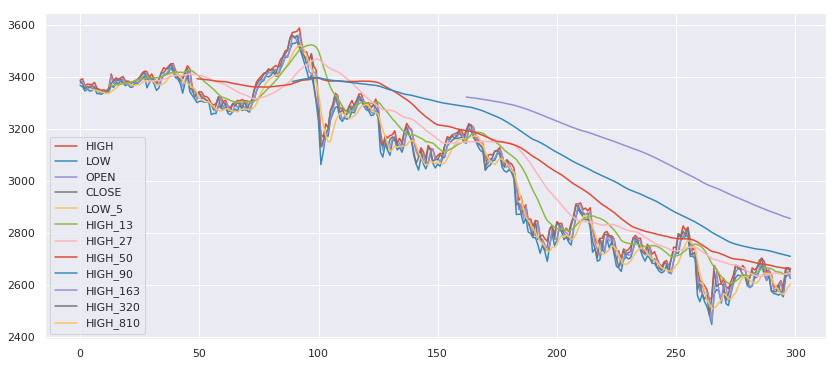

布林带 2630.7320454545425 2698.404189191741 2565.5454113163087


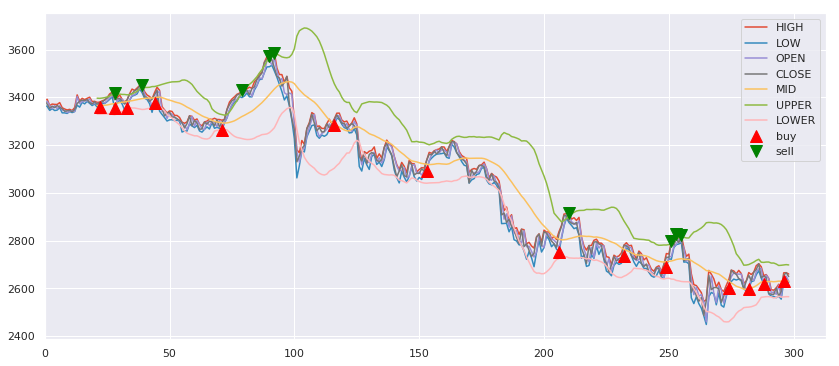

成交市值关系+KDJ显示图及买卖 41103572476184.0 40570849387096.0 18368292111754.25 65.48406718840116 64.20017082413389 68.05185991693568


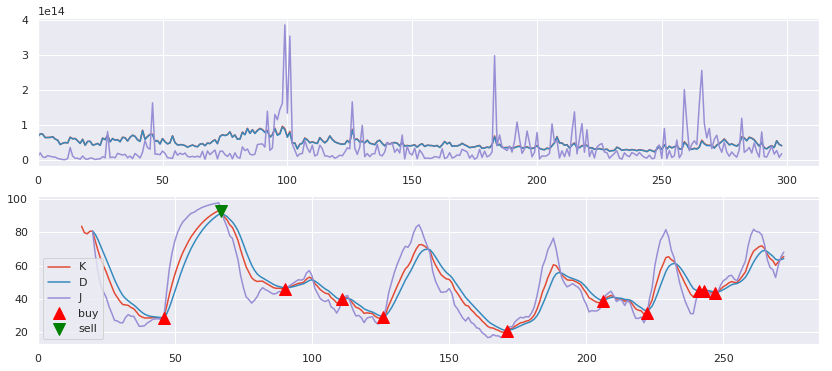

成交量+DMA指标+买卖 -32.59340000000111 -20.15610000000106


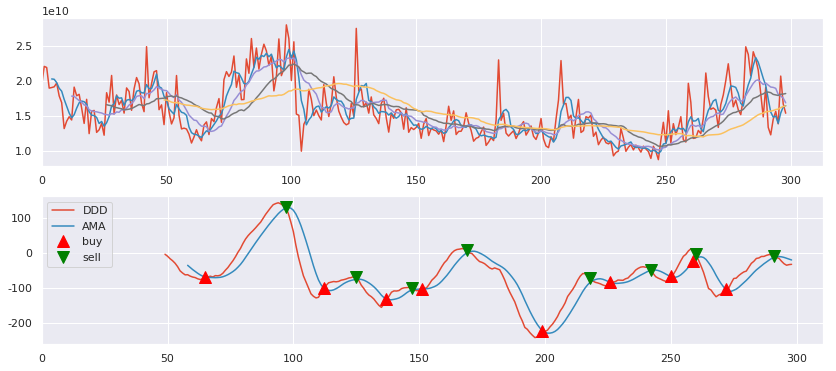

BOLL 2628.176851851854 2701.373092462038 2561.63879389448


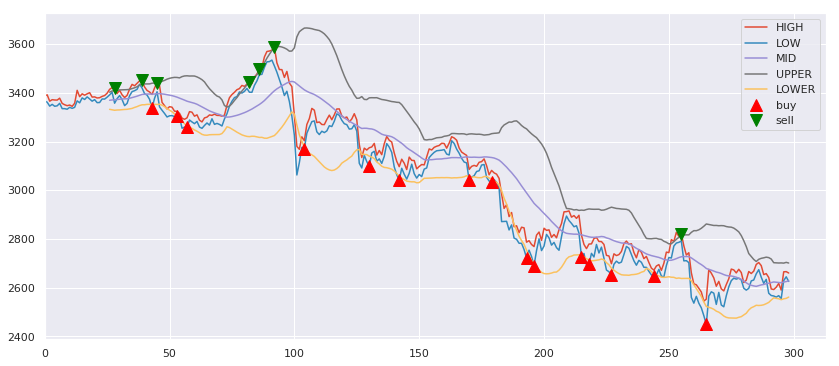

带量BOLL 5807496.494874812 5883752.908515524 5874982.641463517 5830684.31321491 6939495.279511217 9002041.358377196 4926922.884781826


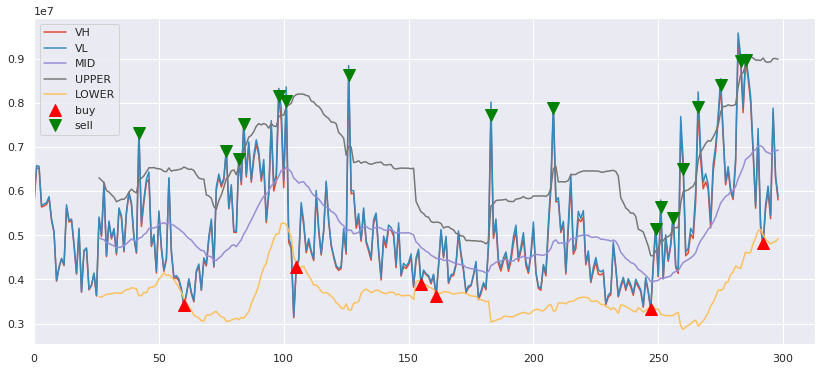

成交量均线+VC -41.71772206434484 33.38570863409485 21.9799048994122


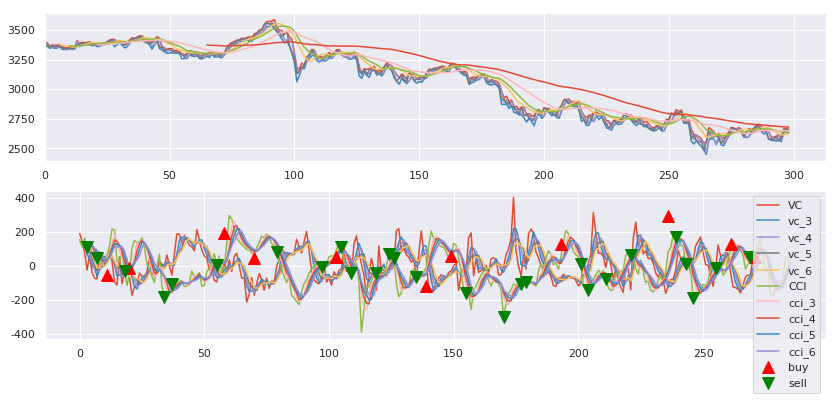

In [7]:
#均线
print("均线",OPEN,CLOSE,HIGH,LOW,VOL)
ax = plt.subplot()
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(OPEN.series, label="OPEN")
ax.plot(CLOSE.series, label="CLOSE")
ax.plot(MA(LOW,5).series, label="LOW_5")
ax.plot(MA(HIGH,13).series, label="HIGH_13")
ax.plot(MA(HIGH,27).series, label="HIGH_27")
ax.plot(MA(HIGH,50).series, label="HIGH_50")
ax.plot(MA(HIGH,90).series, label="HIGH_90")
ax.plot(MA(HIGH,163).series, label="HIGH_163")
ax.plot(MA(HIGH,320).series, label="HIGH_320")
ax.plot(MA(HIGH,810).series, label="HIGH_810")
plt.legend(loc="best")
plt.show()

#N=20,P=2 BOLL 布林带
MID = MA((HIGH+LOW)/2, 22)
UPPER = MID + STD(LOW, 22) * 2
LOWER = MID - STD(HIGH, 22) * 2
print("布林带",MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS(LOW, LOWER) or CROSS(LOW,MID)
sell_signal = CROSS(UPPER,HIGH)
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(OPEN.series, label="OPEN")
ax.plot(CLOSE.series, label="CLOSE")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], LOW.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], HIGH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

#当前股票价格均线+KDJ显示图及买卖
RSV = (HHV(HIGH,1)-LLV(LOW,27))/(HHV(HIGH,27)-LLV(LOW,27))*100
K = EMA(RSV, (9 * 2 - 1))
D = EMA(K, (3 * 2 - 1))
J = K * 3 - D * 2
HV=HIGH*VOL
LV=LOW*VOL
HLV=(HV-LV)*(HIGH-LOW)
print("成交市值关系+KDJ显示图及买卖",HV,LV,HLV,K, D, J)
f1, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(HV.series, label="HV")
ax1.plot(LV.series, label="LV")
ax1.plot(HLV.series, label="HLV")
ax1.set_xlim(0)
ax2.plot(K.series, label="K")
ax2.plot(D.series, label="D")
ax2.plot(J.series, label="J")
ax2.set_xlim(0)
buy_signal = (CROSS(IF(D<50,J,D),D) and CROSS(IF(D<50,K,J),D)) #CROSS(J, K)
sell_signal = (CROSS(D,IF(D>70,J,D)) and CROSS(D,IF(D>80,K,J))) #CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

#当前股票成交量均线+DMA指标+买卖
DDD = MA(CLOSE, 10) - MA(CLOSE, 50)
AMA = MA(DDD, 10)#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
print("成交量+DMA指标+买卖",DDD, AMA)
f2, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(VOL.series, label="VOL")
ax1.plot(MA(VOL, 5).series, label="ma1")
ax1.plot(MA(VOL, 13).series, label="ma2")
ax1.plot(MA(VOL, 27).series, label="ma3")
ax1.plot(MA(VOL, 50).series, label="ma4")
ax1.set_xlim(0)
ax2.plot(DDD.series, label="DDD")
ax2.plot(AMA.series, label="AMA")
ax2.set_xlim(0)
buy_signal = CROSS(IF(DDD<0,DDD,AMA),AMA) 
sell_signal = CROSS(AMA, DDD)#CROSS(IF(DDD>70,DDD,DDD),DDD) 
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

#N=20,P=2 BOLL 布林带
MID = MA((OPEN+HIGH+LOW+CLOSE)/4, 27)
UPPER = MID + STD(LOW, 27) * 2
LOWER = MID - STD(HIGH, 27) * 2
print("BOLL",MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS(LOW, LOWER) and CROSS(LOW,MID) 
sell_signal = CROSS(UPPER,HIGH) and CROSS(UPPER,LOW)
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], LOW.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], HIGH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

#带量BOLL 布林带
VH=VOL/(HIGH)
VL=VOL/(LOW)
VO=VOL/(OPEN)
VC=VOL/(CLOSE)
MID = MA((VH+VL)/2, 27)
UPPER = MID + STD(VL, 27) * 1.618
LOWER = MID - STD(VH, 27) * 1.618
print("带量BOLL",VH,VL,VO,VC,MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS(VL, LOWER) # and CROSS(VL,MID)
sell_signal = CROSS(UPPER,VH) and CROSS(MID,VL)
ax.plot(VH.series, label="VH")
ax.plot(VL.series, label="VL")
#ax.plot(VO.series, label="VO")
#ax.plot(VC.series, label="VC")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], VL.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], VH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

#CCI指标 
def AVEDEV(value,N):#方差函数模块
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)    
    return sum_/N
TYP = (HIGH+LOW+CLOSE)/3
CCI = (TYP-MA(TYP,14))/(0.015*AVEDEV(TYP,14))
VCCI = (VOL-MA(VOL,14))/(0.015*AVEDEV(VOL,14))
VC = ((CCI+VCCI)-MA((CCI+VCCI),14))/(0.015*AVEDEV((CCI+VCCI),14))
VV= VC+CCI
print ("成交量均线+VC",VCCI,CCI,VC)
f3, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(HIGH.series, label="HIGH")
ax1.plot(LOW.series, label="LOW")
ax1.plot(OPEN.series, label="OPEN")
ax1.plot(CLOSE.series, label="CLOSE")
ax1.plot(MA(HIGH, 7).series, label="HIGH_7")
ax1.plot(MA(HIGH, 11).series, label="HIGH_11")
ax1.plot(MA(HIGH, 22).series, label="HIGH_22")
ax1.plot(MA(HIGH, 66).series, label="HIGH_66")
ax1.set_xlim(0)
ax2.plot(VC.series, label="VC")
ax2.plot(MA(VC,3).series, label="vc_3")
ax2.plot(MA(VC, 4).series, label="vc_4")
ax2.plot(MA(VC, 5).series, label="vc_5")
ax2.plot(MA(VC, 6).series, label="vc_6")
ax2.plot(CCI.series, label="CCI")
ax2.plot(MA(CCI, 3).series, label="cci_3")
ax2.plot(MA(CCI, 4).series, label="cci_4")
ax2.plot(MA(CCI, 5).series, label="cci_5")
ax2.plot(MA(CCI, 6).series, label="cci_6")
ax2.set_xlim(-14)
N1=101
N2=-101
N3=101
buy_signal = CROSS(CCI or VC,N1 or N2)
sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0], VCCI.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], CCI.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

In [8]:
# 选股MACD  OK!!!
print ("《RQALPHA本地化开始选股》读取开始时间：==》",("%s" % datetime.datetime.now().isoformat() )) 
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=5) #周二到周六设置前一天数据，周日设定前两天，周一设置前三天！！！
    yesterday=today-oneday  
    return yesterday
d_0 = (getYesterday())# 输出前N天日期
d_1 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
select(
    lambda : CROSS((2*((MA(LOW,12) - MA(LOW,26))-(MA((MA(LOW,12) - MA(LOW,26)),9)))), (((MA(LOW,12) - MA(LOW,26))-(MA((MA(LOW,12) - MA(LOW,26)),9)))/3)),
    start_date=(d_0), end_date=(d_1),
      )
print ("《结束选股》读取结束时间：==》",("%s" % datetime.datetime.now().isoformat() )) 

《RQALPHA本地化开始选股》读取开始时间：==》n5 2018-12-06T17:59:25.088350
lambda : CROSS((2*((MA(LOW,12) - MA(LOW,26))-(MA((MA(LOW,12) - MA(LOW,26)),9)))), (((MA(LOW,12) - MA(LOW,26))-(MA((MA(LOW,12) - MA(LOW,26)),9)))/3)),
[20181206]
没有 000003.XSHE 相关数据
没有 000013.XSHE 相关数据
没有 000015.XSHE 相关数据
没有 000047.XSHE 相关数据
没有 000405.XSHE 相关数据
没有 000412.XSHE 相关数据
没有 000508.XSHE 相关数据
没有 000542.XSHE 相关数据
没有 000556.XSHE 相关数据
没有 000588.XSHE 相关数据
没有 000621.XSHE 相关数据
没有 000653.XSHE 相关数据
没有 000658.XSHE 相关数据
没有 000660.XSHE 相关数据
没有 000675.XSHE 相关数据
没有 000689.XSHE 相关数据
没有 000730.XSHE 相关数据
没有 002257.XSHE 相关数据
没有 002525.XSHE 相关数据
没有 002710.XSHE 相关数据
没有 002720.XSHE 相关数据
没有 002948.XSHE 相关数据
没有 300361.XSHE 相关数据
没有 300646.XSHE 相关数据
没有 300728.XSHE 相关数据
没有 300753.XSHE 相关数据
没有 600349.XSHG 相关数据
没有 600625.XSHG 相关数据
没有 600632.XSHG 相关数据
没有 600646.XSHG 相关数据
没有 600669.XSHG 相关数据
没有 600670.XSHG 相关数据
没有 600709.XSHG 相关数据
没有 600813.XSHG 相关数据
没有 600878.XSHG 相关数据
没有 601206.XSHG 相关数据
没有 601860.XSHG 相关数据
没有 603121.XSHG 相关数据
没有 603302.XSHG 相关数据
没有 

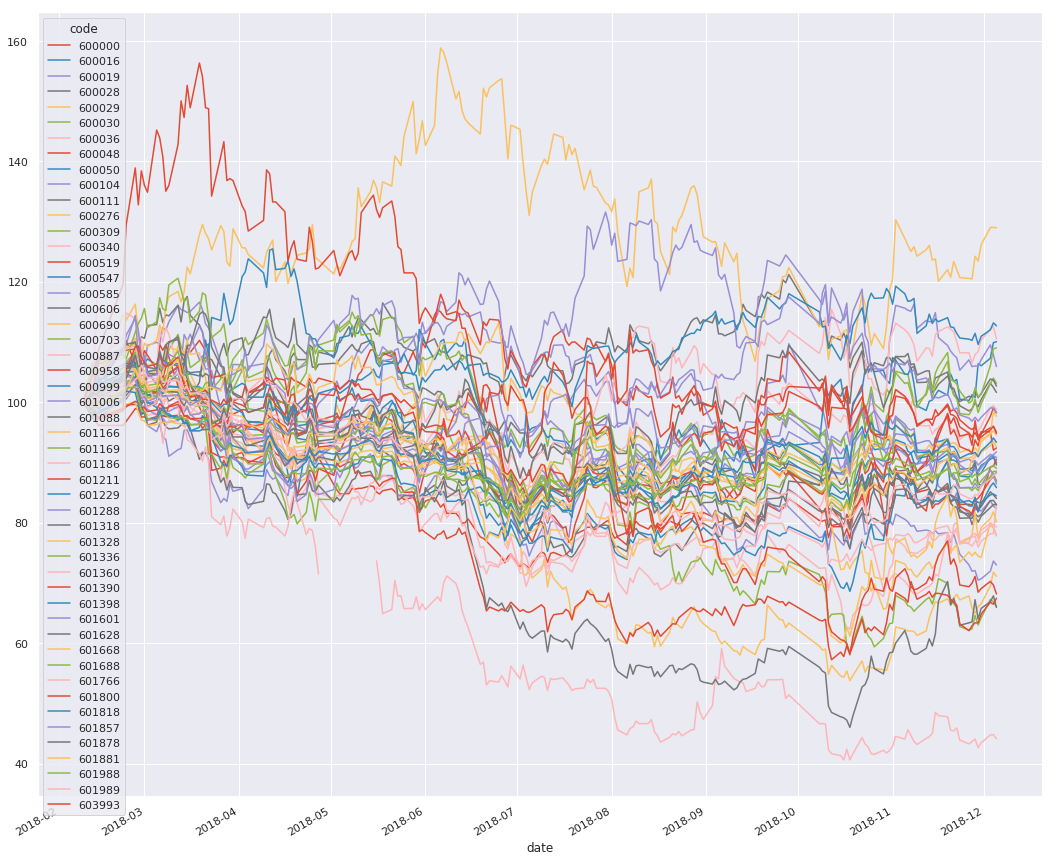

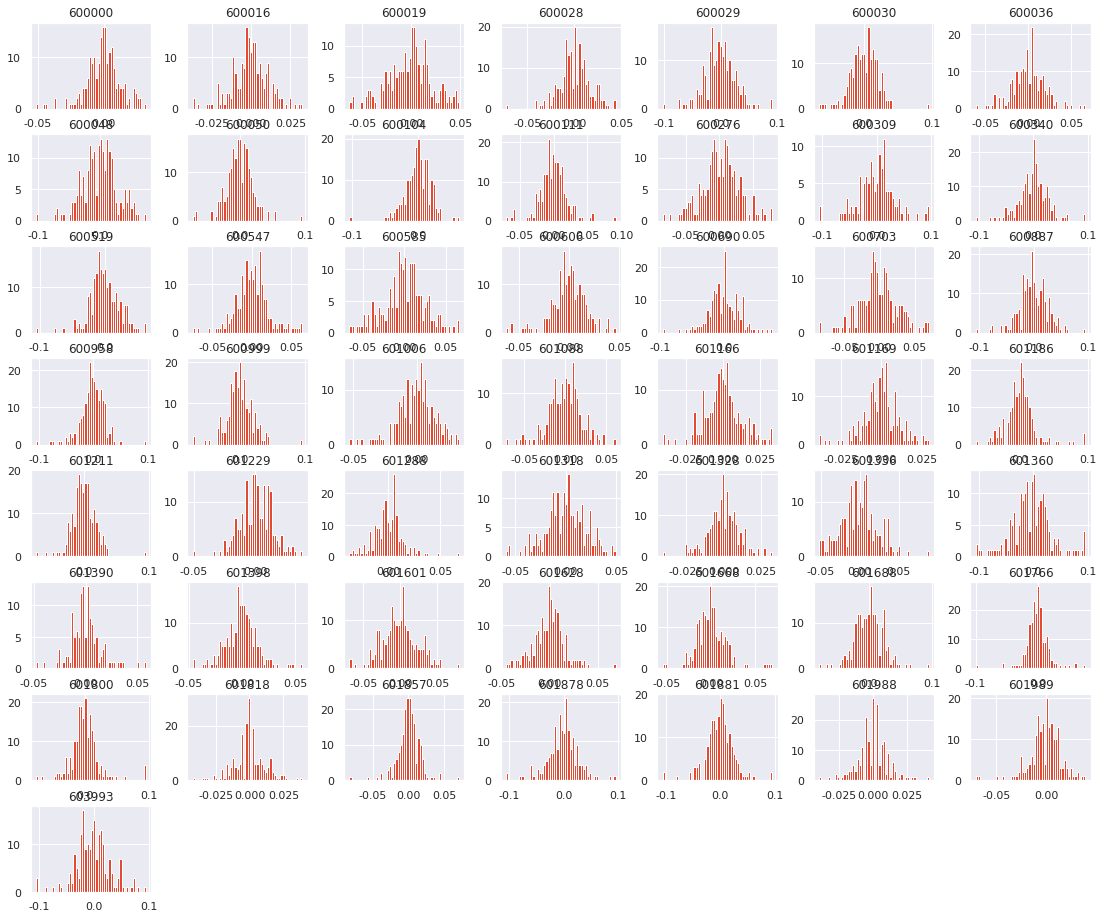

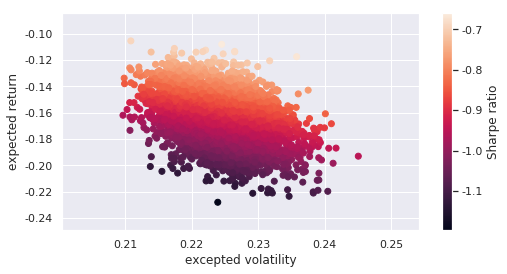

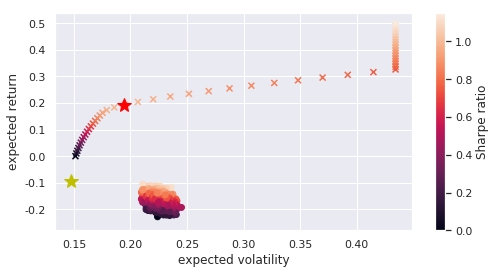

In [9]:
#QUANTAXIS 测试马科维茨有效前沿实现
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt
import QUANTAXIS as QA
# 获取上证50中的四根票
code=QA.QA_fetch_stock_block_adv().get_block('上证50').code[0:50]
data=QA.QA_fetch_stock_day_adv(code,n8,n3).to_qfq() #n8=开始时间见前面设定，n3=今天结束时间前一天。见前面设定。
# 选择close序列, 进行pivot成表
close=data.pivot('close')
close.head()
(close/close.iloc[0]*100).plot(figsize = (18,16))
log_returns=np.log(close/close.shift(1))
log_returns.head()
log_returns.hist(bins = 50, figsize = (19,16))
log_returns.cov()*252
noa=len(code)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights
np.sum(log_returns.mean()*weights)*252
np.dot(weights.T, np.dot(log_returns.cov()*252,weights))
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()* 252,weights)))
port_returns = []
port_variance = []
for p in range(4000):
    weights = np.random.random(noa)
    weights /=np.sum(weights)
    port_returns.append(np.sum(log_returns.mean()*252*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))))
port_returns = np.array(port_returns)
port_variance = np.array(port_variance)
#无风险利率设定为4%
risk_free = 0.04
plt.figure(figsize = (8,4))
plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker = 'o')
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(log_returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])
#最优化投资组合的推导是一个约束最优化问题
import scipy.optimize as sco
#最小化夏普指数的负值
def min_sharpe(weights):
    return -statistics(weights)[2]
#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})
#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数
bnds = tuple((0,1) for x in range(noa))
#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。
opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts
opts['x'].round(3)
#预期收益率、预期波动率、最优夏普指数
statistics(opts['x']).round(3)
#但是我们定义一个函数对 方差进行最小化
def min_variance(weights):
    return statistics(weights)[1]
optv = sco.minimize(min_variance, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
optv
optv['x'].round(3)
#得到的预期收益率、波动率和夏普指数
statistics(optv['x']).round(3)
def  min_variancemin_varia (weights):
    return statistics(weights)[1]
#在不同目标收益率水平（target_returns）循环时，最小化的一个约束条件会变化。
target_returns = np.linspace(0.0,0.5,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])
target_variance = np.array(target_variance)
plt.figure(figsize = (8,4))
#圆圈：蒙特卡洛随机产生的组合分布
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')
#叉号：有效前沿
plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')
#红星：标记最高sharpe组合
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
#黄星：标记最小方差组合
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()

In [10]:
import hikyuu #hikyuu环境测试

ImportError: dlopen(/Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/hikyuu/_hikyuu.so, 2): Library not loaded: @rpath/libiconv.2.dylib
  Referenced from: /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/hikyuu/_hikyuu.so
  Reason: Incompatible library version: _hikyuu.so requires version 9.0.0 or later, but libiconv.2.dylib provides version 7.0.0

In [11]:
import zipline

ModuleNotFoundError: No module named 'zipline'